<a href="https://colab.research.google.com/github/iSanoussi/Classes-and-tests/blob/main/Lab_Supervised_Learning_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification binaire sur Score d'appétence d'un produit bancaire

#### Introduction
Ce lab propose d'utiliser un jeu de données bancaires en explorant les méthodes disponibles sur scikit learn. L'objectif business principal, classique en marketing, est de produire une segmentation de clientèle, c'est-à-dire une répartition en classes homogènes des clients en fonction de leur comportement bancaire. C'est aussi la mise en oeuvre d'une démarche classique permettant d'affiner sa compréhension des données dans l'idée de construire un score d'appétence pour la carte visa premier.

Il s'agit ici d'un score d'appétence de la carte Visa Premier mais ce pourrait être un score d'attrition ({\it churn}) d'un opérateur téléphonique ou encore un score de défaillance d'un emprunteur ou de faillite d'une entreprise; les outils de modélisation sont les mêmes et sont très largement utilisés dans tout le secteur tertiaire pour l'aide à la décision.

Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. On va estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier.

Pour atteindre cet objectif, nous utiliserons la régression logistique et ses différéntes variantes disponibles sur scikit learn
.
## Introduction
### Objectif
Il est généralement préférable d'effectuer une exploration des données avant d'entamer le travail de modélisation. Mais dans le cadre de cet exemple, nous allons directement construire un score d'appétence pour la carte *Visa Premier* à l'aide de méthodes de classification.

Il s'agit d'un score d'appétence mais ce pourrait être le score d'attrition (*churn*) d'un opérateur téléphonique ou encore un score de défaillance d'un emprunteur ou de faillite d'une entreprise; les outils de modélisation sont les mêmes et sont très largement utilisés dans tout le secteur tertiaire pour l'aide à la décision.

### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage). Les noms des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`.

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif)
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier** (qualitative, le Y)


**Important : Executez et modifiez le code pour le comprendre, n'oubliez pas d'utilise les fonctions type et help pour explorer les paramètres et retours des fonctions, modifiez, Googlez les erreurs, lisez la documentation ... **

La base de données représente l'historique bancaire ainsi que les caractéristiques d'un certain nombre de clients. Les variables contenues dans le fichier sont décrites ci-après :




In [ ]:
# Importation des librairies.
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [ ]:
# Lecture d'un data frame
visa_df = pd.read_table('visa.dat', delimiter=' ')
visa_df.shape


(1063, 54)

In [ ]:
visa_df.ndim

2

In [ ]:
visa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 148009 to 7589439
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEXEQ   1063 non-null   object 
 1   FAMIQ   1063 non-null   object 
 2   PCSPQ   1063 non-null   object 
 3   kvunbq  1063 non-null   object 
 4   vienbq  1063 non-null   object 
 5   uemnbq  1063 non-null   object 
 6   xlgnbq  1063 non-null   object 
 7   ylvnbq  1063 non-null   object 
 8   rocnbq  1063 non-null   object 
 9   nptagq  1063 non-null   object 
 10  endetq  1063 non-null   object 
 11  gagetq  1063 non-null   object 
 12  facanq  1063 non-null   object 
 13  lgagtq  1063 non-null   object 
 14  havefq  1063 non-null   object 
 15  jnbjdq  1063 non-null   object 
 16  ageq    1063 non-null   object 
 17  relatq  1063 non-null   object 
 18  qsmoyq  1063 non-null   object 
 19  opgnbq  1063 non-null   object 
 20  moyrvq  1063 non-null   object 
 21  tavepq  1063 non-null   objec

In [ ]:
visa_df.describe()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,...,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,...,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,...,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,...,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


In [ ]:
#count-values
visa_df["CARVP"].nunique(dropna=False)

2

In [ ]:
visa_df["CARVP"].value_counts()

Cnon    706
Coui    357
Name: CARVP, dtype: int64

In [ ]:
visa_df.head()

,SEXEQ,FAMIQ,PCSPQ,kvunbq,vienbq,uemnbq,xlgnbq,ylvnbq,rocnbq,nptagq,...,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL,CARVP
148009,Shom,Fcou,Pint,K1,V1,U2,X2,Y2,R1,N0,...,2,13.161865,2,12.110635,14,0,14.080718,13.230263,0.693147,Coui
552427,Shom,Fcou,Pint,K0,V0,U1,X0,Y1,R0,N0,...,0,0.000000,1,8.132413,0,0,11.717872,0.000000,0.000000,Coui
556005,Shom,Fseu,Psan,K0,V0,U2,X1,Y2,R1,N0,...,1,10.743178,2,10.309286,14,0,11.329303,0.000000,0.000000,Coui
556686,Shom,Fseu,Pouv,K0,V1,U2,X2,Y2,R1,N1,...,3,12.899220,2,11.203025,11,1,13.111856,9.972267,2.772589,Coui
642680,Shom,Fcou,Pint,K0,V0,U2,X1,Y2,R1,N0,...,1,10.457976,2,9.190546,27,0,11.304904,0.000000,1.386294,Coui


In [ ]:
# Variables quantitatives
visa_df.describe()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,...,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,...,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,...,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,...,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


Vérifier ci-dessous que la plupart des variables ont deux versions, l'une quantitative et l'autre qualitative. Dans un premier temps, nous n'allons considérer que les variables quantitatives.

Les variables qualitatives (sexe, csp, famille) seront transformées en indicatrices à l'exception de la cible `CARVP`.

In [ ]:
visa_df.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [ ]:
vispremDum=pd.get_dummies(visa_df[["SEXEQ","FAMIQ","PCSPQ"]])


In [ ]:
visa_df["SEXEQ"].value_counts()

Shom    661
Sfem    402
Name: SEXEQ, dtype: int64

In [ ]:
visa_df["FAMIQ"].value_counts()

Fcou    583
Fseu    480
Name: FAMIQ, dtype: int64

In [ ]:
visa_df["PCSPQ"].value_counts()

Psan    301
Pouv    287
Pint    277
Pemp    167
Pcad     31
Name: PCSPQ, dtype: int64

In [ ]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [ ]:
vispremDum.columns

Index(['SEXEQ_Sfem', 'SEXEQ_Shom', 'FAMIQ_Fcou', 'FAMIQ_Fseu', 'PCSPQ_Pcad',
       'PCSPQ_Pemp', 'PCSPQ_Pint', 'PCSPQ_Pouv', 'PCSPQ_Psan'],
      dtype='object')

In [ ]:
vispremDum.drop(["SEXEQ_Sfem","FAMIQ_Fseu"], axis = 1, inplace = True)

In [ ]:
help(vispremDum.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis: 'Axis' = 0, index=None, columns=None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'str' = 'raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equiv

In [ ]:
vispremDum.columns

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan'],
      dtype='object')

In [ ]:
vispremNum = visa_df.select_dtypes(exclude=['object'])
vispremNum.columns

Index(['RELAT', 'AGER', 'OPGNBL', 'MOYRVL', 'TAVEPL', 'ENDETL', 'GAGETL',
       'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY', 'QCREDL', 'DMVTPL', 'BOPPNL',
       'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL', 'UEMNB', 'XLGNB', 'XLGMTL',
       'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG', 'ITAVCL', 'HAVEFL', 'JNBJDL'],
      dtype='object')

In [ ]:
vispremR=pd.concat([vispremDum,vispremNum],axis=1)


In [ ]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis=0, join='outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'FrameOrSeriesUnion'
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised.
    a

In [ ]:
# Transformation en indicatrices
vispremDum=pd.get_dummies(visa_df[["SEXEQ","FAMIQ","PCSPQ"]])
# Une seule est conservée pour les variables binaires
vispremDum.drop(["SEXEQ_Sfem","FAMIQ_Fseu"], axis = 1, inplace = True)
# Sélection des variables numériques
vispremNum = visa_df.select_dtypes(exclude=['object'])
# Concaténation des variables retenues
vispremR=pd.concat([vispremDum,vispremNum],axis=1)
vispremR.columns

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'RELAT', 'AGER', 'OPGNBL', 'MOYRVL',
       'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY',
       'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL',
       'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG',
       'ITAVCL', 'HAVEFL', 'JNBJDL'],
      dtype='object')

**Q** Combien d'individus et combien de variables sont finalement concernés?

In [ ]:
#  On va recoder la variable à expliquer en 0 et 1
y=visa_df["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

### Extraction des échantillons apprentissage et test

In [ ]:
y.dtype

dtype('int64')

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
rd_seed=111 # Modifier cette valeur d'initialisation, elle vous assure que lors de la ré-execution, les valeurs générées seront les mêmes
npop=len(visa_df)
xApp,xTest,yApp,yTest=train_test_split(vispremR,y,test_size=200,random_state=rd_seed)
xApp.shape

(863, 35)

## Régression logistique
Cette ancienne méthode reste toujours très utilisée. D'abord par habitude dans les entreprises (profils statistique) mais aussi par rapport à sa simplicité et son `explicabilité`. Petite anécdote : les équipes Criteo ou CDiscount utilisent souvent cette méthode dans leurs analyses.

### Estimation et optimisation de la régression logistique
Documentez vous sur l'optimisation de la régression logistique avec lasso ( )

In [ ]:
from sklearn.linear_model import LogisticRegression
# Grille de valeurs du paramètre de pénalisaiton
param=[{"C":[0.5,1,5,10,12,15,30]}]
logitL = GridSearchCV(LogisticRegression(penalty="l1",solver='liblinear'), param,cv=5,n_jobs=-1)
logitLasso=logitL.fit(xApp, yApp)
# Sélection du paramètre optimal
logitLasso.best_params_["C"]
print("Meilleur score (apprentissage) = %f, Meilleur paramètre = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_))

Meilleur score (apprentissage) = 0.163342, Meilleur paramètre = {'C': 30}


In [ ]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

Erreur des prédictions

In [ ]:
# Prédiction
yChap = logitLasso.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Lasso = %f" % (1-logitLasso.score(xTest, yTest)))

CARVP    0   1
row_0         
0      117  18
1       15  50
Erreur de test régression Lasso = 0.165000


#### Optimisation *ridge*

Documentez vous sur l'optimisation ridge sur les liens suivants :

In [ ]:
# Grilles de valeurs du paramètre de pénalisation
param=[{"C":[0.5,1,5,10,12,15,30]}]
logitR = GridSearchCV(LogisticRegression(penalty="l2",solver='liblinear'), param,cv=5,n_jobs=-1)
logitRidge=logitR.fit(xApp, yApp)
# Sélection du paramètre optimal
logitRidge.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitRidge.best_score_,logitRidge.best_params_))

Meilleur score = 0.162192, Meilleur paramètre = {'C': 12}


In [ ]:
# Prévision
yChap = logitRidge.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Ridge = %f" % (1-logitRidge.score(xTest, yTest)))

CARVP    0   1
row_0         
0      118  19
1       14  49
Erreur de test régression Ridge = 0.165000


**Q** Noter l'erreur de prévision;
### Interprétation

L'objet LassoOpt issu de GridSearchCV ne retient pas les paramètres estimés dans le modèle. Il faut donc ré-estimer avec la valeur optimale du paramètre de pénalisation si l'on souhaite afficher ces coefficients.

In [ ]:
LassoOpt=LogisticRegression(penalty="l1",solver='liblinear',C=12)
LassoOpt=LassoOpt.fit(xApp, yApp)
# Récupération des coefficients
vect_coef=np.matrix.transpose(LassoOpt.coef_)
vect_coef=vect_coef.ravel()
#Affichage des 25 plus importants
coef=pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)

PCSPQ_Pcad    2.945221
PCSPQ_Psan    2.198579
XLGNB         1.739828
PCSPQ_Pouv    1.495583
UEMNB         1.491941
SEXEQ_Shom    1.449681
KVUNB         1.264429
BOPPNL        1.125977
NPTAG         1.024353
YLVNB         0.920406
PCSPQ_Pint    0.761600
PCSPQ_Pemp    0.714092
OPGNBL        0.688645
QCREDL        0.633054
ENDETL        0.507132
MOYRVL        0.376341
VIENB         0.197211
DMVTPL        0.155247
XLGMTL        0.116634
YLVMTL        0.091004
JNBJDL        0.087901
GAGECL        0.087579
FAMIQ_Fcou    0.081197
FACANL        0.077697
ITAVCL        0.074963
HAVEFL        0.070688
TAVEPL        0.058683
GAGETL        0.048601
GAGEML        0.042838
ROCNB         0.039319
LGAGTL        0.024214
VIEMTL        0.017756
RELAT         0.006816
AGER          0.004366
QSMOY         0.000007
dtype: float64


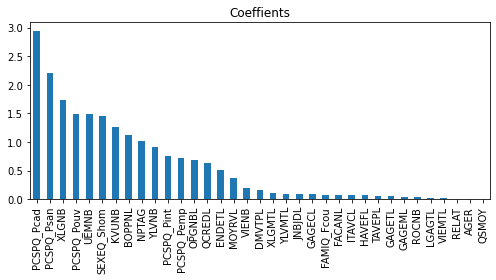

In [ ]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()
plt.show()

**Q** Quelles sont les variables importantes? Comment interpréter?

**Q** La pénalisation Lasso est-elle effective?

Il serait intéressant de comparer acec les versions *ridge* et *elestic net* d'optiisation du modèle.

### Courbe ROC

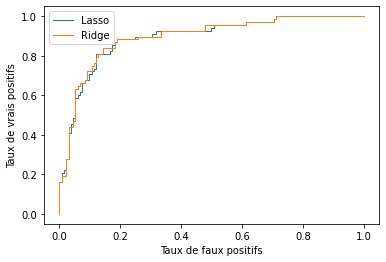

In [ ]:
from sklearn.metrics import roc_curve
listMethod=[["Lasso",logitLasso],["Ridge",logitRidge]]

for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

### K plus proches voisins

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier(n_neighbors=10)
# Définition du modèle
disKnn=knn.fit(xApp, yApp)
# Prévision de l'échantillon test
yChap = disKnn.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test knn = %f" % (1-disKnn.score(xTest,yTest)))

CARVP    0   1
row_0         
0      116  44
1       16  24
Erreur de test knn = 0.300000


In [ ]:
yChap

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1])

In [ ]:
#Optimisation du paramètre de complexité k
#Grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
disKnn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
disKnnOpt=disKnn.fit(xApp, yApp) # GridSearchCV est lui même un estimateur
# paramètre optimal
disKnnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-disKnnOpt.best_score_,disKnnOpt.best_params_))

Meilleur score = 0.291995, Meilleur paramètre = {'n_neighbors': 6}


In [ ]:
# Prévision de l'échantillon test
yChap = disKnnOpt.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)

# Estimation de l'erreur de prévision sur l'échantillon test
print("Erreur de test knn_opt = %f" % (1-disKnnOpt.score(xTest,yTest)))

CARVP    0   1
row_0         
0      120  42
1       12  26
Erreur de test knn_opt = 0.270000


In [ ]:
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()
disLin=lda.fit(xApp, yApp)
# Prévision de l'échantillon test
yChap = disLin.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test lda = %f" % (1-disLin.score(xTest,yTest)))

CARVP    0   1
row_0         
0      120  18
1       12  50
Erreur de test lda = 0.150000


In [ ]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
disQua=qda.fit(xApp, yApp)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
# Prévision de l'échantillon test
yChap = disQua.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test qda = %f" % (1-disQua.score(xTest,yTest)))

CARVP    0   1
row_0         
0      116  29
1       16  39
Erreur de test qda = 0.225000


Courbes ROC

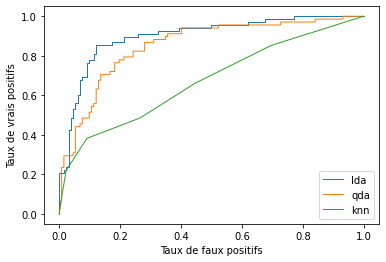

In [ ]:
from sklearn.metrics import roc_curve
# Liste des méthodes
listMethod=[["lda",disLin],["qda",disQua],["knn",disKnnOpt]]
# Tracé des courbes
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

## Arbres binaires de décision
Les arbres binaires de décision concurrencent la régression logistique et gardent une place de choix dans les services de Gestion de la Relation Client, pour la facilité d'interprétation des modèles qui en découlent. L'optimisation de la complexité d'un artbre peut être délicate à opérer cr très sensible aux fluctuations de l'échantillon.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# définition du modèle
tree= DecisionTreeClassifier()
treeC=tree.fit(xApp, yApp)

**Q** Quel est le critère d'homogénéité des noeuds utilisé par défaut?

**Q** Quel est le problème concernant l'élagage de l'arbre dans `Scikkit-learn` vis à vis des possibliités de la librairie `rpart` de R?

In [ ]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(xApp, yApp)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.126303, Meilleur paramètre = {'max_depth': 3}


In [ ]:
# Prévision de l'échantillon test
yChap = treeOpt.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)# Erreur de prévision sur le test
print("Erreur de test tree qualitatif = %f" % (1-treeOpt.score(xTest,yTest)))

CARVP    0   1
row_0         
0      122  22
1       10  46
Erreur de test tree qualitatif = 0.160000


In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
conda install graphviz

SyntaxError: ignored

In [ ]:
from sklearn.tree import export_graphviz


from six import StringIO
#from sklearn.externals.six import StringIO



import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(xApp,yApp)
dot_data = StringIO()
export_graphviz(treeG, out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("treeOpt.png")

True

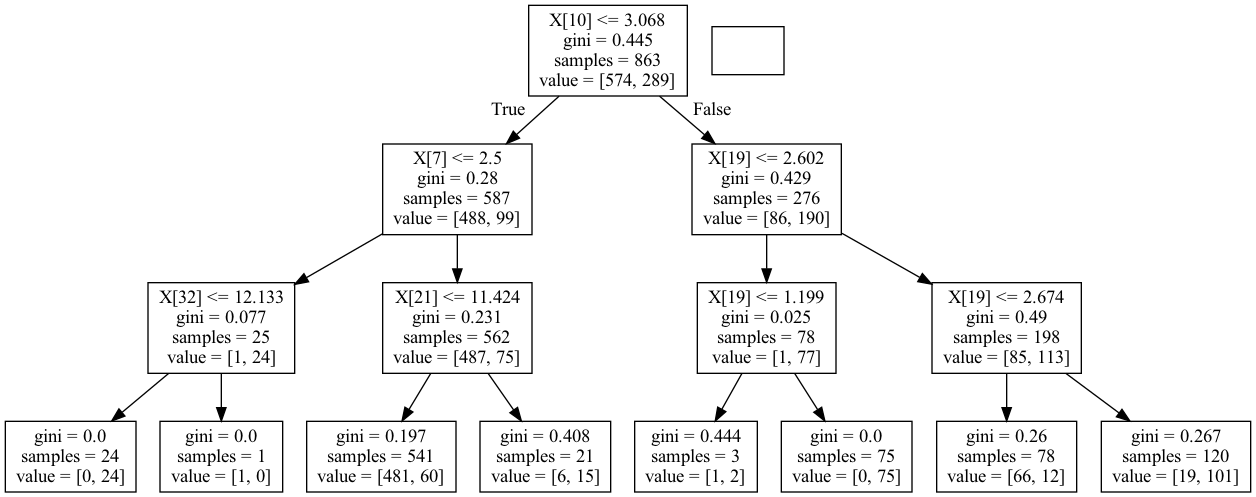

In [ ]:
from IPython.display import Image
Image(filename='treeOpt.png')

### [Courbes ROC](http://wikistat.fr/pdf/st-m-app-risque.pdf)
Comparaison des méthodes précédentes.

La valeur de seuil par défaut (0.5) n'étant pas nécessairement celle "optimale", il est important de comparer les courbes ROC.

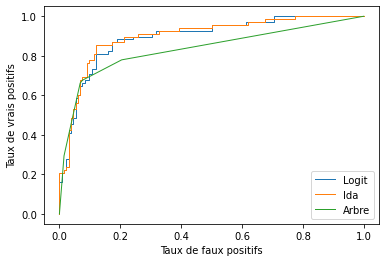

In [ ]:
# Liste des méthodes
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt]]
# Tracé des courbes
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

## Commentez les résultats :

**Q** Conséquence du croisement des courbes ROC sur l'évaluation de l'AUC.

**Q** Quelle est la meilleure méthode ? Quelle est la meilleure méthode par rapport à la facilité de son interprétation ?

**Exercice** Ajouter les SVM dans la comparaison.